# Detect Heart Disease
This dataset contains data about patient vitals and heart disease(if any) of the same.

-----

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Understanding the Data
-----

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [6]:
df.sample(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1095,55,1,2,130,262,0,0,155,0,0.0,1,0
875,64,1,3,140,335,0,0,158,0,0.0,1,1
265,47,1,3,140,193,0,0,145,1,1.0,2,1
273,55,1,4,140,201,0,0,130,1,3.0,2,1
1066,53,1,3,130,246,1,2,173,0,0.0,1,0
467,55,1,3,120,0,0,1,125,1,2.5,2,1
97,39,1,3,160,147,1,0,160,0,0.0,1,0
874,55,1,4,132,353,0,0,132,1,1.2,2,1
484,58,1,4,120,0,0,2,106,1,1.5,3,1
574,72,1,4,160,123,1,2,130,0,1.5,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**INFO**: There is no null values present in the dataset.

In [8]:
df.duplicated().sum()

272

In [9]:
df.drop_duplicates(inplace=True)

**INFO**: There were around 272 duplicated values so we had to remove it from our dataset.

In [10]:
df.shape

(918, 12)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [12]:
df['resting bp s'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [13]:
df[df['resting bp s']==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [14]:
df = df[df['resting bp s']>0]

**INFO**: A Resting BP of 0 is not physiologically possible. It indicates a missing, corrupt or miscoded data. 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
sex,917.0,0.789531,0.407864,0.0,1.0,1.0,1.0,1.0
chest pain type,917.0,3.251908,0.931502,1.0,3.0,4.0,4.0,4.0
resting bp s,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
cholesterol,917.0,199.016358,109.246330,0.0,174.0,223.0,267.0,603.0
fasting blood sugar,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
resting ecg,917.0,0.604144,0.806161,0.0,0.0,0.0,1.0,2.0
max heart rate,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
exercise angina,917.0,0.404580,0.491078,0.0,0.0,0.0,1.0,1.0
oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2


In [16]:
df['cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [17]:
df = df[df['cholesterol']>0]

**INFO**: Cholesterol cannot be 0 in a living human.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
sex,746.0,0.756032,0.429762,0.0,1.00,1.0,1.0,1.0
chest pain type,746.0,3.163539,0.955414,1.0,2.00,3.0,4.0,4.0
resting bp s,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
fasting blood sugar,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
resting ecg,746.0,0.639410,0.838664,0.0,0.00,0.0,1.0,2.0
max heart rate,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
exercise angina,746.0,0.384718,0.486855,0.0,0.00,0.0,1.0,1.0
oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2


In [19]:
df['max heart rate'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126, 149, 157,  86,  84, 123, 117,  97,
       161,  69, 131,  80,  88, 113, 109,  73, 141, 159, 133, 151,  93,
       111, 181, 186, 163, 179, 177, 173, 169, 171, 147,  71, 192, 182,
       195,  95, 194, 187, 202])

In [20]:
df = df[df['max heart rate'].between(71,202,inclusive='both')]

**INFO**: On the PDF File, it was clearly mentioned that max_heart_rate needs to be between 71-202.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,745.0,52.875168,9.510421,28.0,46.0,54.0,59.0,77.0
sex,745.0,0.755705,0.429957,0.0,1.0,1.0,1.0,1.0
chest pain type,745.0,3.162416,0.955564,1.0,2.0,3.0,4.0,4.0
resting bp s,745.0,133.024161,17.294320,92.0,120.0,130.0,140.0,200.0
cholesterol,745.0,244.348993,58.673432,85.0,207.0,237.0,275.0,603.0
fasting blood sugar,745.0,0.166443,0.372728,0.0,0.0,0.0,0.0,1.0
resting ecg,745.0,0.640268,0.838900,0.0,0.0,0.0,1.0,2.0
max heart rate,745.0,140.322148,24.401070,71.0,122.0,140.0,160.0,202.0
exercise angina,745.0,0.385235,0.486978,0.0,0.0,0.0,1.0,1.0
oldpeak,745.0,0.901477,1.073576,-0.1,0.0,0.5,1.5,6.2


In [22]:
df['oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  1.3,
        1.6,  1.2,  1.9,  1.7,  0.1,  0.4,  0.3,  0.2, -0.1,  1.4,  1.1,
        1.8,  3.5,  2.4,  0.6,  2.6,  3.1,  2.3,  3.4,  0.9,  2.2,  3.6,
        4.2,  3.2,  0.7,  5.6,  3.8,  2.1,  2.9,  2.8,  6.2,  4.4])

In [23]:
df['oldpeak'] = df['oldpeak'].replace(-0.1,0.0)

**INFO**: OLDPEAK cant be negative. it should simplt be set to 0 (no ST depression).

In [24]:
df['target'].value_counts()

target
0    389
1    356
Name: count, dtype: int64

In [25]:
df['target'].value_counts(normalize=True)

target
0    0.522148
1    0.477852
Name: proportion, dtype: float64

**INFO**: The dataset is almos balanced, which is great for most classification models. 

# Exploratory Data Analysis
----

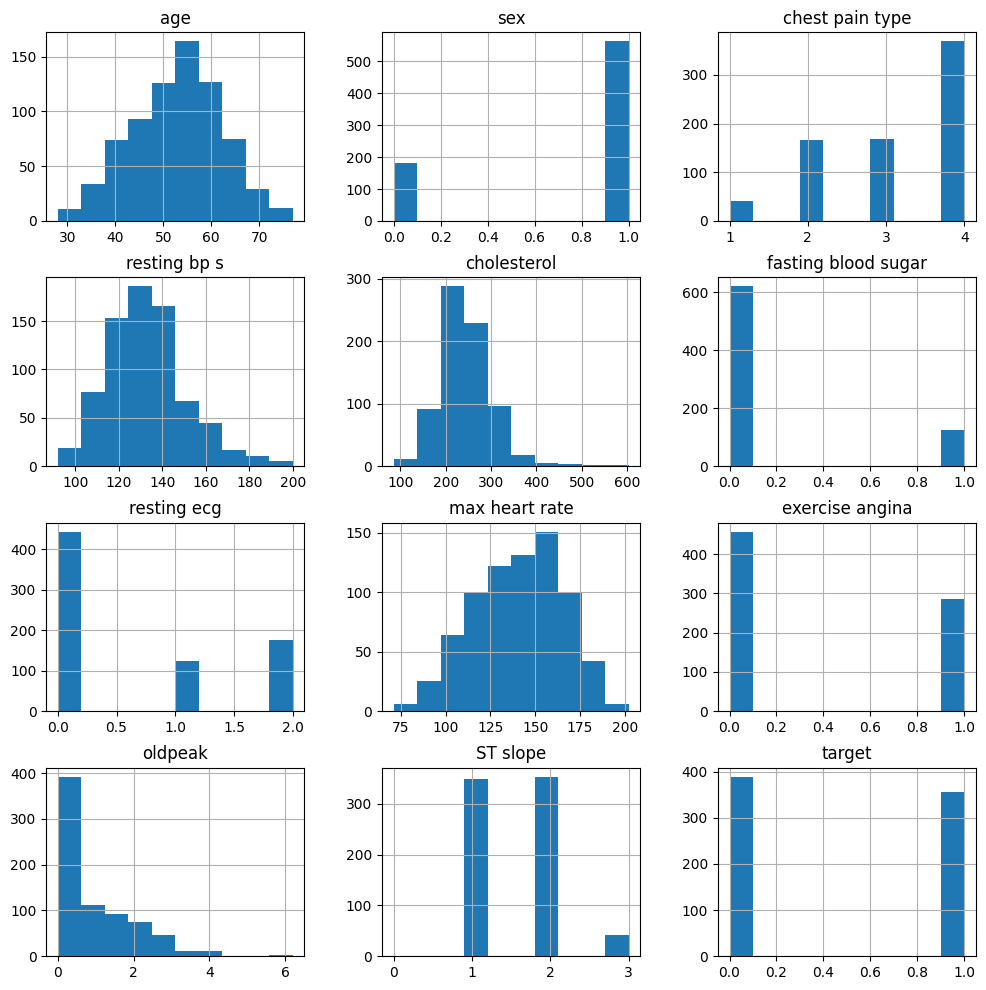

In [26]:
df.hist(figsize=(12,12))
plt.show()

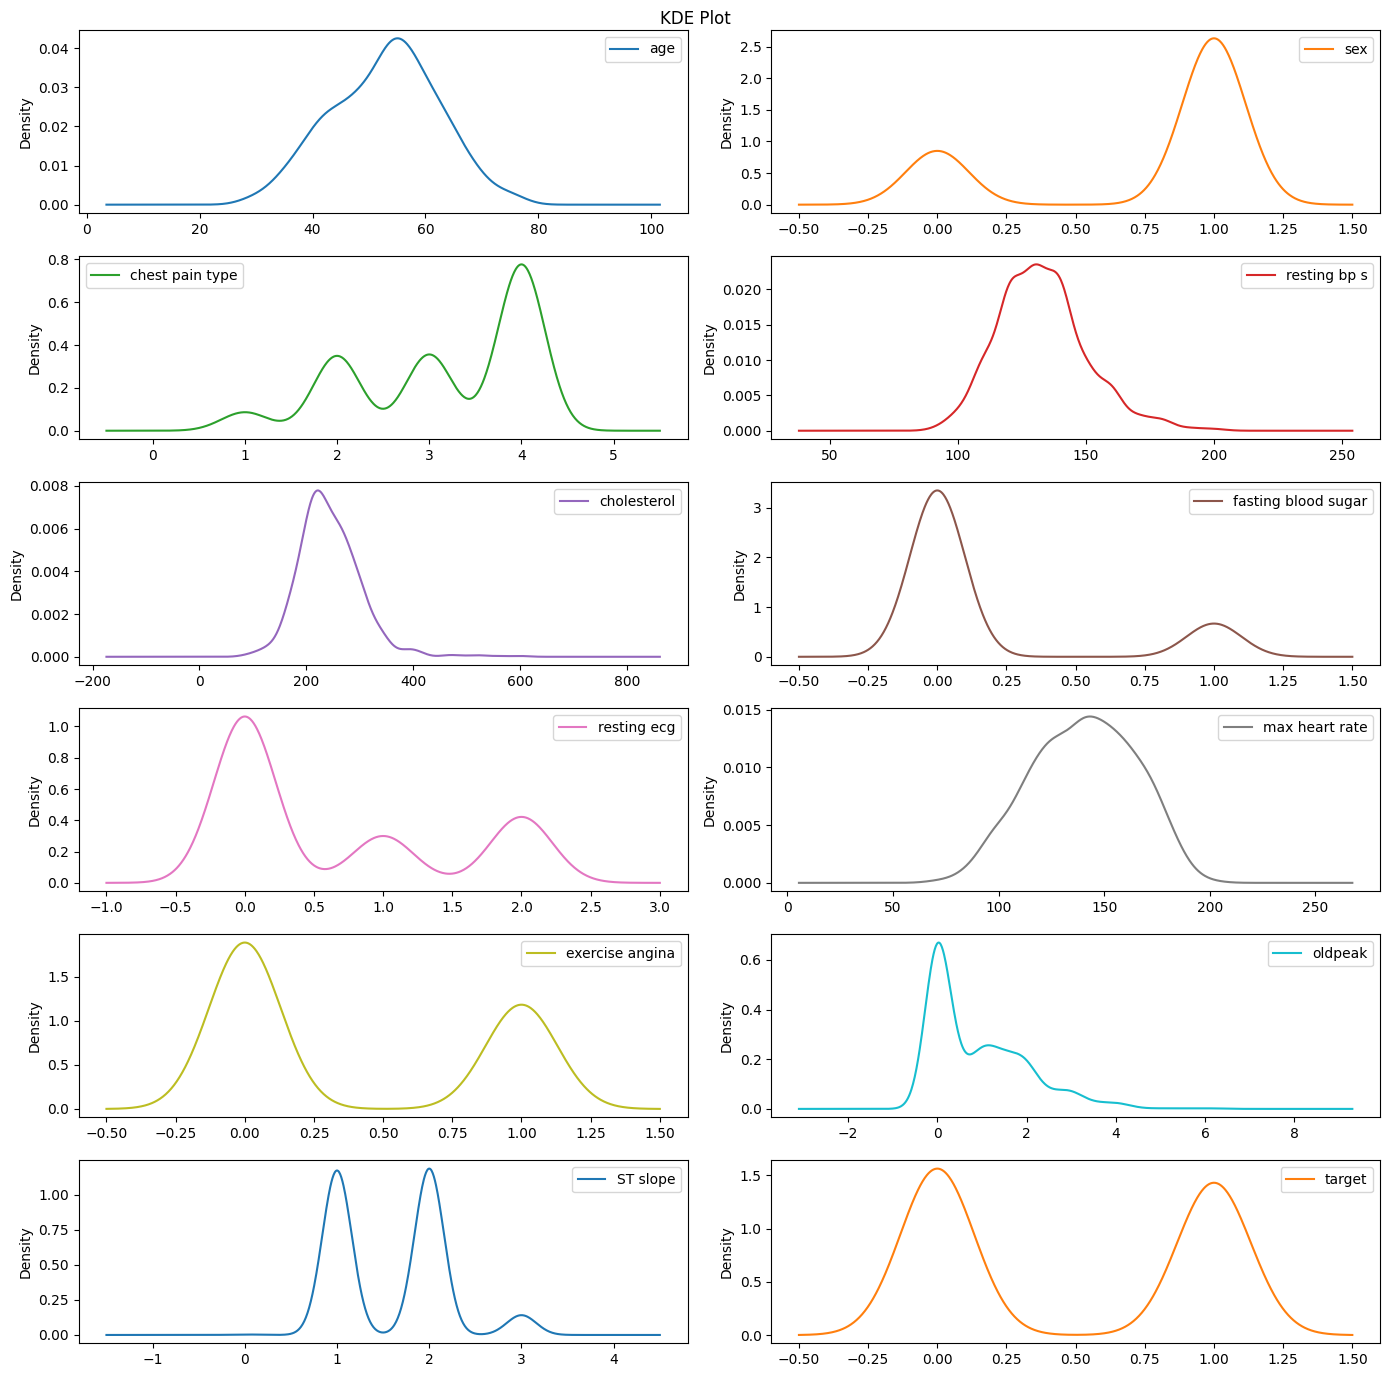

In [27]:
df.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title='KDE Plot',sharex=False)
plt.tight_layout()
plt.show()

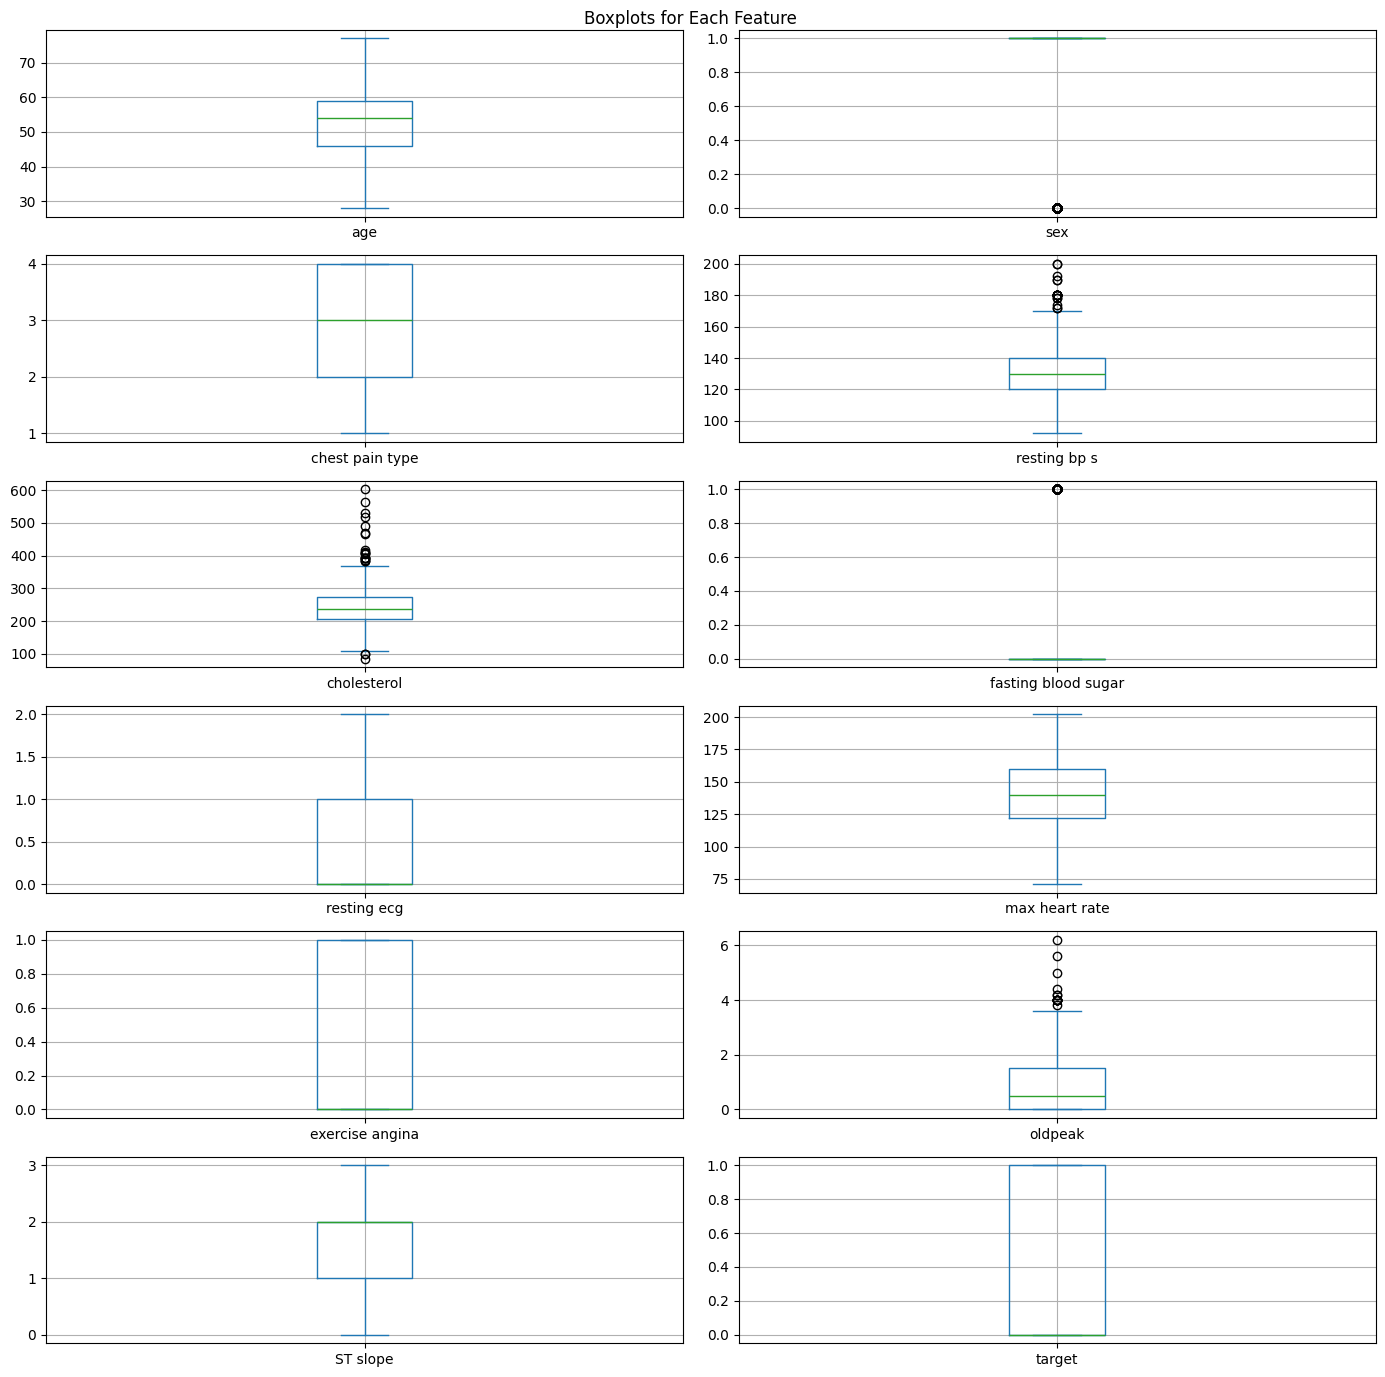

In [28]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(14,14),sharex=False,sharey=False,title='Boxplots for Each Feature',grid=True)
plt.tight_layout()
plt.show()

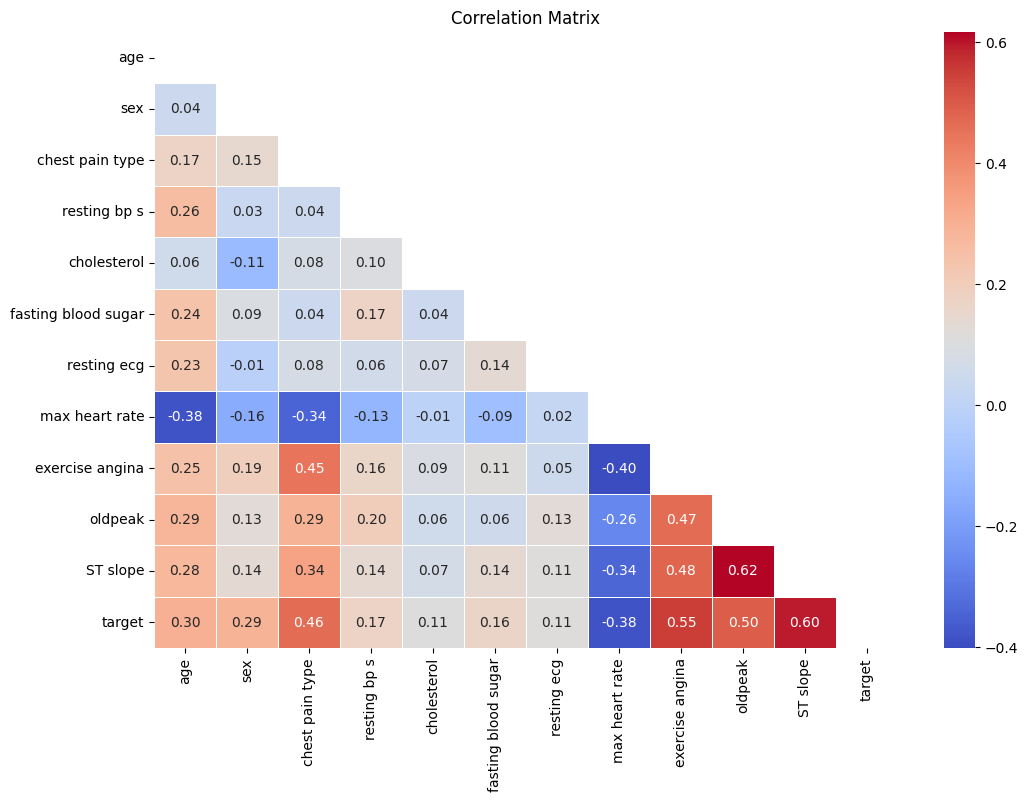

In [29]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr,mask=mask,cmap='coolwarm',annot=True, fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Performing Multicollinearity Check
-----

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [33]:
x = add_constant(df.drop('target',axis=1))

vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data = vif_data[vif_data['feature']!='const']
vif_data = vif_data.sort_values(by='VIF',ascending=False)
vif_data

,feature,VIF
11,ST slope,1.838002
10,oldpeak,1.790846
9,exercise angina,1.663890
8,max heart rate,1.436593
1,age,1.396386
3,chest pain type,1.343437
4,resting bp s,1.122613
6,fasting blood sugar,1.110571
7,resting ecg,1.099768
2,sex,1.079692


**INFO**: Our data doesn't have any multicollinearity as the values are less than 5.

# Feature Selection using Random Forest Selection
-----

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
x = df.drop('target',axis=1)
y = df['target']

model = RandomForestClassifier(random_state=43)
model.fit(x,y)

RandomForestClassifier(random_state=43)

In [36]:
importance_df = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
importance_df = importance_df.sort_values(by='importance',ascending=False)
importance_df

,feature,importance
10,ST slope,0.250752
9,oldpeak,0.117447
7,max heart rate,0.110016
8,exercise angina,0.103733
2,chest pain type,0.101184
0,age,0.090652
4,cholesterol,0.073382
3,resting bp s,0.070963
1,sex,0.042243
6,resting ecg,0.028841


In [37]:
top_8_features = importance_df.head(8)['feature'].tolist()
top_8_features

['ST slope',
 'oldpeak',
 'max heart rate',
 'exercise angina',
 'chest pain type',
 'age',
 'cholesterol',
 'resting bp s']

In [38]:
df = df[top_8_features + ['target']].copy()

In [39]:
df

,ST slope,oldpeak,max heart rate,exercise angina,chest pain type,age,cholesterol,resting bp s,target
0,1,0.0,172,0,2,40,289,140,0
1,2,1.0,156,0,3,49,180,160,1
2,1,0.0,98,0,2,37,283,130,0
3,2,1.5,108,1,4,48,214,138,1
4,1,0.0,122,0,3,54,195,150,0
...,...,...,...,...,...,...,...,...,...
1185,2,1.2,132,0,1,45,264,110,1
1186,2,3.4,141,0,4,68,193,144,1
1187,2,1.2,115,1,4,57,131,130,1
1188,2,0.0,174,0,2,57,236,130,1


# Understanding the Skewness of the data
----

In [40]:
skewness = df.skew(axis=0)
skewness

ST slope           0.440362
oldpeak            1.219349
max heart rate    -0.146170
exercise angina    0.472605
chest pain type   -0.709284
age               -0.100961
cholesterol        1.220771
resting bp s       0.619422
target             0.088857
dtype: float64

**INFO**: Need to apply transformation on  `oldpeak`, `cholesterol` and `resting bp s`. Rest all are Acceptable.

In [41]:
df['oldpeak_log'] = np.log1p(df['oldpeak'])

In [42]:
df['cholesterol_log'] = np.log1p(df['cholesterol'])

In [43]:
skewness = df.skew(axis=0)
skewness

ST slope           0.440362
oldpeak            1.219349
max heart rate    -0.146170
exercise angina    0.472605
chest pain type   -0.709284
age               -0.100961
cholesterol        1.220771
resting bp s       0.619422
target             0.088857
oldpeak_log        0.461548
cholesterol_log   -0.109036
dtype: float64

In [44]:
from scipy.stats import boxcox
df['resting_bp_log'] = np.log1p(df['resting bp s'])
df['resting_bp_sqrt'] = np.sqrt(df['resting bp s'])
df['resting_bp_boxcox'], _ = boxcox(df['resting bp s'] + 1)

In [45]:
skewness = df.skew(axis=0)
skewness

ST slope             0.440362
oldpeak              1.219349
max heart rate      -0.146170
exercise angina      0.472605
chest pain type     -0.709284
age                 -0.100961
cholesterol          1.220771
resting bp s         0.619422
target               0.088857
oldpeak_log          0.461548
cholesterol_log     -0.109036
resting_bp_log       0.201634
resting_bp_sqrt      0.405751
resting_bp_boxcox   -0.001962
dtype: float64

In [46]:
df.drop(['oldpeak','cholesterol','resting_bp_log','resting_bp_sqrt','resting bp s'],axis=1,inplace=True)

In [47]:
df

,ST slope,max heart rate,exercise angina,chest pain type,age,target,oldpeak_log,cholesterol_log,resting_bp_boxcox
0,1,172,0,2,40,0,0.000000,5.669881,1.812328
1,2,156,0,3,49,1,0.693147,5.198497,1.822771
2,1,98,0,2,37,0,0.000000,5.648974,1.806227
3,2,108,1,4,48,1,0.916291,5.370638,1.811161
4,1,122,0,3,54,0,0.000000,5.278115,1.817811
...,...,...,...,...,...,...,...,...,...
1185,2,132,0,1,45,1,0.788457,5.579730,1.791624
1186,2,141,0,4,68,1,1.481605,5.267858,1.814590
1187,2,115,1,4,57,1,0.788457,4.882802,1.806227
1188,2,174,0,2,57,1,0.000000,5.468060,1.806227


**NOTE**: No need to save the np.log1p() as its a simple transformation which can be applied as it is when needed. 

But this not the case for BoxCox so we need to save it in pickle format. 

In [48]:
import pickle
with open('boxcox_lambda_resting_bp.pkl','wb') as file:
    pickle.dump(_,file)

In [49]:
df

,ST slope,max heart rate,exercise angina,chest pain type,age,target,oldpeak_log,cholesterol_log,resting_bp_boxcox
0,1,172,0,2,40,0,0.000000,5.669881,1.812328
1,2,156,0,3,49,1,0.693147,5.198497,1.822771
2,1,98,0,2,37,0,0.000000,5.648974,1.806227
3,2,108,1,4,48,1,0.916291,5.370638,1.811161
4,1,122,0,3,54,0,0.000000,5.278115,1.817811
...,...,...,...,...,...,...,...,...,...
1185,2,132,0,1,45,1,0.788457,5.579730,1.791624
1186,2,141,0,4,68,1,1.481605,5.267858,1.814590
1187,2,115,1,4,57,1,0.788457,4.882802,1.806227
1188,2,174,0,2,57,1,0.000000,5.468060,1.806227


# Model Selection
-----

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [52]:
x = df.drop('target',axis=1)
y = df['target']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43,stratify=y, shuffle=True)

In [54]:
classifiers = {
    'Logistics Regression': LogisticRegression(random_state=43),
    'Random Forest Classifier': RandomForestClassifier(random_state=43),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=43),
    'Ada Boost Classifier': AdaBoostClassifier(random_state=43),
    'Extra Trees Classifier': ExtraTreesClassifier(random_state=43),
    'Support Vector Classifier': SVC(random_state=43),
    'Decision Tree Classifier' : DecisionTreeClassifier(random_state=43),
    'Gaussian Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(random_state=43),
    'LightGBM' : LGBMClassifier(random_state=43)
}

In [55]:
metrics = {
    'Model' : [],
    'Accuracy' : [],
    'Recall' : [],
    'Precision' : [],
    'F1 Score' : [],
    'ROC_AUC' : []
}

In [56]:
for model_name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)
    metrics['ROC_AUC'].append(roc_auc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 285, number of negative: 311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478188 -> initscore=-0.087304
[LightGBM] [Info] Start training from score -0.087304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [57]:
metrics_df = pd.DataFrame(metrics)

In [58]:
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score,ROC_AUC
0,Logistics Regression,0.832215,0.788732,0.848485,0.817518,0.830264
1,Random Forest Classifier,0.852349,0.830986,0.855072,0.842857,0.851390
2,Gradient Boosting Classifier,0.865772,0.816901,0.892308,0.852941,0.863579
3,Ada Boost Classifier,0.859060,0.802817,0.890625,0.844444,0.856537
4,Extra Trees Classifier,0.879195,0.845070,0.895522,0.869565,0.877663
5,Support Vector Classifier,0.677852,0.619718,0.676923,0.647059,0.675244
6,Decision Tree Classifier,0.771812,0.802817,0.740260,0.770270,0.773203
7,Gaussian Naive Bayes,0.832215,0.802817,0.838235,0.820144,0.830896
8,K-Nearest Neighbors,0.691275,0.718310,0.662338,0.689189,0.692488
9,XGBoost,0.859060,0.816901,0.878788,0.846715,0.857169


**INFO**: Go with `ExtraTreesClassifier` as our primary model as it has better Accuracy, F1 Score, Recall, Precision and ROC_AUC.

# Extra Trees Classifier HyperParameter Tuning
-----

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],  
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [False, True],
    'max_leaf_nodes': [None, 10, 20, 30, 50],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'warm_start': [False, True]
}

In [61]:
model = ExtraTreesClassifier(random_state=43)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter = 100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=43,
    n_jobs=-1
)

random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=False; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=False; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=10, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; total time=

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=None, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.01, n_estimators=400, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.01, n_estimators=400, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.01, n_estimators=400, warm_start=False; total time=   0.3s
[CV] END bootstrap=

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=30, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=400, warm_start=True; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END boots

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=30, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=True; total time=   0.4s
[CV] END bo

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=None, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=False; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=None, max_features=0.7, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=30, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=False; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=None, max_features=0.7, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=40, max_features=log2, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=sqrt, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; to

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=20, max_features=0.5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, warm_start=True; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=True; total time=   

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=T

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=None, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=None, max_features=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=400, warm_start=False; total time=   0.2s
[CV] END bootstrap

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=0.5, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=None, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=False; total time=   0.1s
[CV] EN

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=40, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=40, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=40, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=40, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weigh

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=40, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total ti

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=30, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.05, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, cla

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=40, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=200, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=40, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=300, warm_start=True; total time=   0.2s
[CV] END bootstrap=T

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=30, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400, warm_start=False; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=30, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400, warm_start=False; total time=   0.5s
[CV] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=30, max_features=0.7, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=400, warm_start=False; tot

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=10, max_features=None, max_leaf_nodes=30, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.01, n_estimators=300, warm_start=False; total time=   0.2s
[CV] END

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=True, class_weight=None, criterion=entropy, max_depth=40, max_features=0.7, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.05, n_estimators=100, warm_start=False; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=200, warm_start=True; total time=   0.1s
[CV] END bootstrap=True, cla

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.0, n_estimators=500, warm_start=False; tot

/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/rithul.v/Desktop/Projects/myvenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class f

[CV] END bootstrap=False, class_weight=None, criterion=log_loss, max_depth=None, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=400, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=30, min_samples_leaf=2, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=500, warm_start=True; total time=   0.5s
[CV] END bootstrap=False, class_weight=None, criterion=log_loss, max_depth=None, max_features=log2, max_leaf_nodes=20, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=400, warm_start=True; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=None, max_features=log2, max_leaf_nodes=30, min_samples_leaf=4, min_samples_split=10, min_weight_fraction_leaf=0.01, n_estimators=100, warm_start=True; total time=   0.1s
[CV] END bootstrap=

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=43),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.5, 0.7],
                                        'max_leaf_nodes': [None, 10, 20, 30,
                                                           50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.01,
                                                                     0.05],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'warm_start': [False, True]},
                   random_state=43, scoring='accuracy', verbose=2)

In [62]:
random_search.best_params_

{'warm_start': True,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.05,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 50,
 'max_features': 0.7,
 'max_depth': 40,
 'criterion': 'log_loss',
 'class_weight': 'balanced',
 'bootstrap': False}

In [63]:
best_classifier = random_search.best_estimator_

In [64]:
y_pred = best_classifier.predict(x_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [66]:
metrics = {
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': [],
    'ROC_AUC': []
}

metrics['Accuracy'].append(accuracy)
metrics['Recall'].append(recall)
metrics['Precision'].append(precision)
metrics['F1 Score'].append(f1)
metrics['ROC_AUC'].append(roc_auc)

In [67]:
metrics_best_rf_df = pd.DataFrame(metrics)
metrics_best_rf_df

,Accuracy,Recall,Precision,F1 Score,ROC_AUC
0,0.845638,0.84507,0.833333,0.839161,0.845612


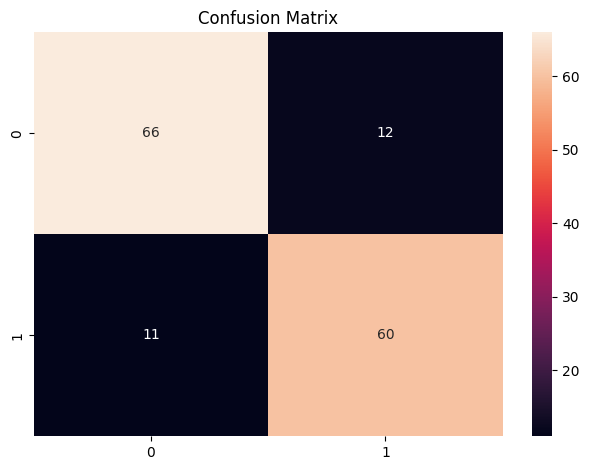

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [73]:
import joblib

joblib.dump(best_classifier,'model.pkl')

['model.pkl']